In [1]:
#PROGRAMA PARA DETECÇÃO DE FONTES
from astropy.stats import sigma_clipped_stats
import scipy.ndimage as ndi
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import photutils

In [2]:
#Importar imagem
GHII = 'teste455.fits'
fits.info(GHII)

data = fits.open(GHII)
data = data[0].data

#Estatística de sigma cortado
mean , median , std = sigma_clipped_stats ( data , sigma = 3. )  
print (( mean , median , std ))  #média, mediana e desvio padrão

Filename: teste455.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (221, 221)   float32   
(0.012631285, 0.006650932, 0.014774841)


<IPython.core.display.Javascript object>


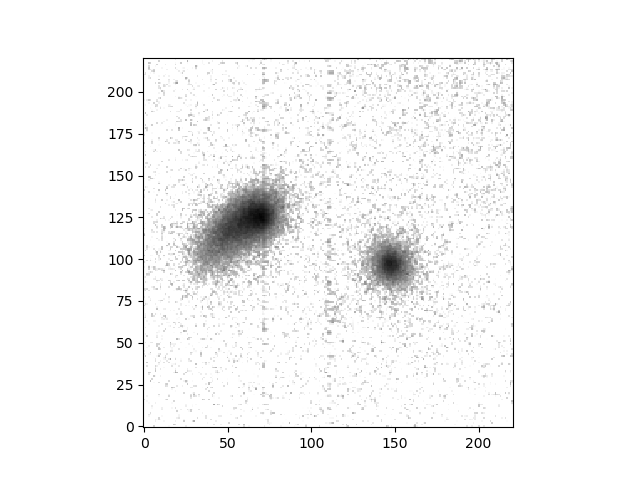

In [3]:
#Plot da Imagem
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.imshow(data, origin='lower', cmap='gray_r', norm=LogNorm(vmin=0.025, vmax=1))

<IPython.core.display.Javascript object>


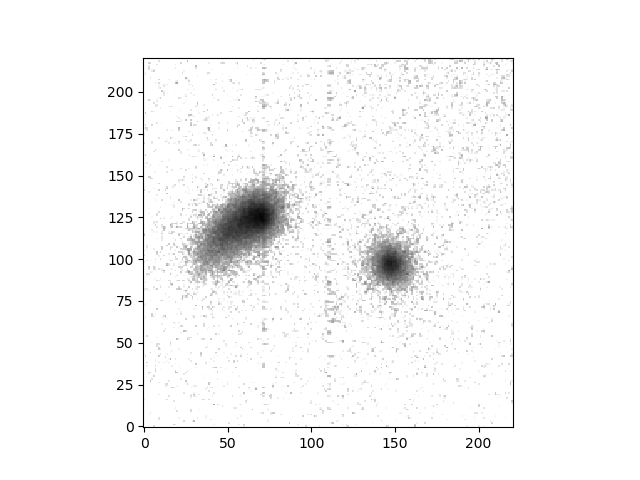

In [4]:
#Plot da imagem com background subtraido
%matplotlib notebook
data_sub = data - median
plt.imshow(data_sub, origin='lower', cmap='gray_r', norm=LogNorm(vmin=0.025, vmax=1))

In [5]:
#Subtração do background e DAOStarFinder (implementação do algoritmo DAOFIND) para encontrar as estrelas na imagem.
#from photutils import DAOStarFinder
#Threshold = photutils.detect_threshold(data_sub, snr=5.0, background=None, error=None)
#daofind = DAOStarFinder(fwhm=20.0, threshold = 5.*std) #Estrelas com FWHMs de 3 pixels e picos aprox. 5sigma acima plano de fundo
#sources = daofind(data - median)  
#for col in sources.colnames:  
#    sources[col].info.format = '%.2g'  # for consistent table output
#print(sources)  

In [6]:
from photutils import find_peaks


#Estatística de sigma cortado da imagem subtraida do fundo
mean , median , std = sigma_clipped_stats ( data_sub , sigma = 5. )  
print (( mean , median , std ))  #média, mediana e desvio padrão

#Calcule uma imagem de limite em pixel que pode ser usada para detectar fontes.
threshold = photutils.detect_threshold(data_sub, snr=5.0, background=None, error=None) #error=None; Se None , um valor eficaz de fundo escalar será estimado usando estatísticas cortadas por sigma. 

tbl = find_peaks(data_sub,threshold, box_size=11)
tbl['peak_value'].info.format = '%.5g'  # for consistent table output
print(tbl[:10])  # print only the first 10 peaks

(0.00986513588577509, 0.0020631924271583557, 0.020919444039463997)
x_peak y_peak peak_value
------ ------ ----------
    30      3   0.069205
    42     13   0.082417
    67     22   0.078354
   219     26   0.069317
   127     31   0.075806
    19     32   0.076028
   109     32    0.08329
   168     35   0.078645
    16     40   0.070521
   151     45   0.068302


In [45]:
print(tbl['peak_value'])

peak_value
----------
  0.069205
  0.082417
  0.078354
  0.069317
  0.075806
  0.076028
   0.08329
  0.078645
  0.070521
  0.068302
       ...
  0.076833
  0.089807
  0.073795
  0.086877
  0.071574
  0.076896
  0.076064
  0.070733
  0.069894
  0.068553
  0.072161
Length = 113 rows


In [24]:
help(tbl['peak_value'])

Help on Column in module astropy.table.column object:

class Column(BaseColumn)
 |  Column(data=None, name=None, dtype=None, shape=(), length=0, description=None, unit=None, format=None, meta=None, copy=False, copy_indices=True)
 |  
 |  Define a data column for use in a Table object.
 |  
 |  Parameters
 |  ----------
 |  data : list, ndarray or None
 |      Column data values
 |  name : str
 |      Column name and key for reference within Table
 |  dtype : numpy.dtype compatible value
 |      Data type for column
 |  shape : tuple or ()
 |      Dimensions of a single row element in the column data
 |  length : int or 0
 |      Number of row elements in column data
 |  description : str or None
 |      Full description of column
 |  unit : str or None
 |      Physical unit
 |  format : str or None or function or callable
 |      Format string for outputting column values.  This can be an
 |      "old-style" (``format % value``) or "new-style" (`str.format`)
 |      format specificatio

<IPython.core.display.Javascript object>


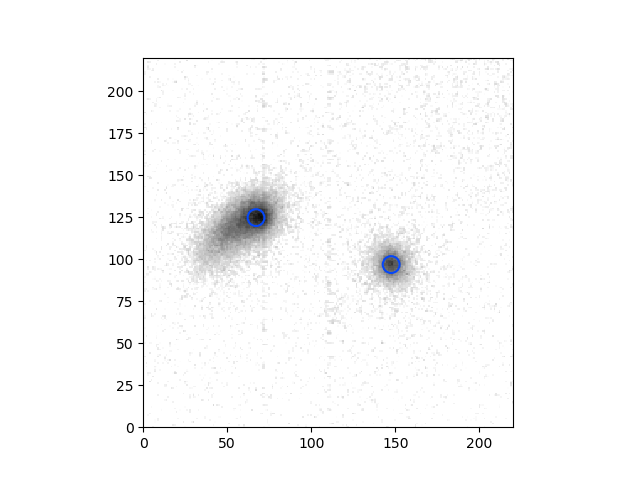

(0, 220)

In [49]:
#PLot dos PICOS DETECTADOS
%matplotlib notebook

import numpy as np
from astropy.visualization import simple_norm

from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
apertures = CircularAperture(positions, r=5.)
norm = simple_norm(data_sub, 'sqrt', percent=99.9)
plt.imshow(data_sub, cmap='Greys', origin='lower',vmin=0.025, vmax=1, norm=norm)
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, data.shape[1]-1)
plt.ylim(0, data.shape[0]-1)